In [174]:
import pandas as pd
df_train = pd.read_csv("~/Devel/Kaggle/Titanic/train.csv")

df_train.head(8)
df_train.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [78]:
import pandas as pd
df_train = pd.read_csv("~/Devel/Kaggle/Titanic/train.csv")

sex_dum = pd.get_dummies(df_train['Sex'])
df_train_proc = pd.concat((df_train,sex_dum),axis=1)
df_train_proc = df_train_proc.drop('Sex',axis=1)
df_train_proc = df_train_proc.drop('female',axis=1)

emb_dum = pd.get_dummies(df_train['Embarked'])
df_train_proc = pd.concat((df_train_proc,emb_dum),axis=1)
df_train_proc = df_train_proc.drop('Embarked',axis=1)
df_train_proc = df_train_proc.drop('S',axis=1)

df_train_proc_dn = df_train_proc.dropna()
df_train_proc_dn = df_train_proc_dn.drop('PassengerId',axis=1)
df_train_proc_dn = df_train_proc_dn.drop('Name',axis=1)
df_train_proc_dn = df_train_proc_dn.drop('Ticket',axis=1)
df_train_proc_dn = df_train_proc_dn.drop('Cabin',axis=1)
 
df_train_proc_dn.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,C,Q
Survived,1.000000,-0.037227,-0.244604,0.100339,0.018723,0.134019,-0.535727,0.098712,-0.039232
Pclass,-0.037227,1.000000,-0.307590,-0.100324,0.049894,-0.315069,-0.041725,-0.228001,-0.038676
Age,-0.244604,-0.307590,1.000000,-0.161625,-0.274813,-0.091542,0.172307,0.076824,0.017855
SibSp,0.100339,-0.100324,-0.161625,1.000000,0.258993,0.285492,-0.095344,-0.050628,0.169778
Parch,0.018723,0.049894,-0.274813,0.258993,1.000000,0.388783,-0.081832,-0.068949,-0.065543
Fare,0.134019,-0.315069,-0.091542,0.285492,0.388783,1.000000,-0.129871,0.239531,0.015604
male,-0.535727,-0.041725,0.172307,-0.095344,-0.081832,-0.129871,1.000000,-0.053879,-0.002826
C,0.098712,-0.228001,0.076824,-0.050628,-0.068949,0.239531,-0.053879,1.000000,-0.076941
Q,-0.039232,-0.038676,0.017855,0.169778,-0.065543,0.015604,-0.002826,-0.076941,1.000000


In [167]:
import pandas as pd
df_train = pd.read_csv("~/Devel/Kaggle/Titanic/train.csv")
df_test = pd.read_csv('~/Devel/Kaggle/Titanic/test.csv')

age_mean_test = df_test.groupby('Sex').Age.mean()
def get_age_mean_test(x):
    return round(age_mean_test[x.Sex])

df_test.Age.fillna(df_test[df_test.Age.isnull()].apply(get_age_mean_test,axis=1),inplace=True)
df_test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [80]:
import pandas as pd
df_train = pd.read_csv("~/Devel/Kaggle/Titanic/train.csv")

df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.779091,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.017438,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [102]:
import pandas as pd
df_train = pd.read_csv("~/Devel/Kaggle/Titanic/train.csv")

pd.crosstab(df_train['Sex'], df_train['Survived'])

df_train['Female'] = df_train['Sex'].map( {'male': 0, 'female': 1} ).astype(int)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Female
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [171]:
import pandas as pd
df_train = pd.read_csv("~/Devel/Kaggle/Titanic/train.csv")

pd.crosstab(df_train['Pclass'], df_train['Survived'])

pclass_df_train  = pd.get_dummies(df_train['Pclass'],prefix='Class')
pclass_df_train = pclass_df_train.drop(['Class_3'], axis=1)
df_train = df_train.join(pclass_df_train)
df_train.head()
sex_dummy = pd.get_dummies(df_train['Sex'])
print(sex_dummy)

     female  male
0         0     1
1         1     0
2         1     0
3         1     0
4         0     1
5         0     1
6         0     1
7         0     1
8         1     0
9         1     0
10        1     0
11        1     0
12        0     1
13        0     1
14        1     0
15        1     0
16        0     1
17        0     1
18        1     0
19        1     0
20        0     1
21        0     1
22        1     0
23        0     1
24        1     0
25        1     0
26        0     1
27        0     1
28        1     0
29        0     1
..      ...   ...
861       0     1
862       1     0
863       1     0
864       0     1
865       1     0
866       1     0
867       0     1
868       0     1
869       0     1
870       0     1
871       1     0
872       0     1
873       0     1
874       1     0
875       1     0
876       0     1
877       0     1
878       0     1
879       1     0
880       1     0
881       0     1
882       1     0
883       0     1
884       

In [169]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
%matplotlib inline

# 訓練データ/テストデータ読み込み
df_train = pd.read_csv('~/Devel/Kaggle/Titanic/train.csv')
df_test = pd.read_csv('~/Devel/Kaggle/Titanic/test.csv')

# 性別毎の年齢平均値算出
age_train_mean = df_train.groupby('Sex').Age.mean()
def fage(x):
    if x.Sex == 'male':
        return round(age_train_mean['male'])
    if x.Sex == 'female':
        return round(age_train_mean['female'])

# Ageの欠損値を性別毎の年齢平均値で補完
df_train.Age.fillna(df_train[df_train.Age.isnull()].apply(fage,axis=1), inplace=True)

# 性別毎の年齢平均値算出
age_test_mean = df_test.groupby('Sex').Age.mean()
def fage(x):
    if x.Sex == 'male':
        return round(age_test_mean['male'])
    if x.Sex == 'female':
        return round(age_test_mean['female'])

# Ageの欠損値を性別毎の年齢平均値で補完
df_test.Age.fillna(df_test[df_test.Age.isnull()].apply(fage,axis=1),inplace=True)

# Sex と Survived のクロス集計
# pd.crosstab(df_train['Sex'], df_train['Survived'])

# 性別カラムを数値に置き換え
df_train['Female'] = df_train['Sex'].map( {'male': 0, 'female': 1} ).astype(int)
df_test['Female'] = df_test['Sex'].map( {'male': 0, 'female': 1} ).astype(int)

# Pclass と Survived のクロス集計
# pd.crosstab(df_train['Pclass'], df_train['Survived'])

# Pclass をダミー変数化 & 3番目のクラスはドロップ(多重共線性を避けるためらしい)
pclass_df_train  = pd.get_dummies(df_train['Pclass'],prefix='Class')
pclass_df_test  = pd.get_dummies(df_test['Pclass'],prefix='Class')
pclass_df_train = pclass_df_train.drop(['Class_3'], axis=1)
pclass_df_test = pclass_df_test.drop(['Class_3'], axis=1)
df_train = df_train.join(pclass_df_train)
df_test = df_test.join(pclass_df_test)
 
# いらないカラムをドロップ。最終的なモデルへの入力データとする。
X = df_train.drop(['PassengerId','Survived','Pclass','Name','Sex','SibSp','Parch','Ticket','Fare','Cabin','Embarked'],axis=1)

# 期待値
y = df_train.Survived

# モデルの生成
clf = LogisticRegression()

# 学習実行
clf.fit(X, y)

# スコア
clf.score(X,y)

# テストデータから生存者を予測
test_id = df_test["PassengerId"]
df_test = df_test.drop(['PassengerId','Pclass','Name','Sex','SibSp','Parch','Ticket','Fare','Cabin','Embarked'],axis=1)
test_predict = clf.predict(df_test)
print(zip(test_id, test_predict))
# print(df_test.head())
print(X.head())

    Age  Female  Class_1  Class_2
0  22.0       0        0        0
1  38.0       1        1        0
2  26.0       1        0        0
3  35.0       1        1        0
4  35.0       0        0        0


<function matplotlib.pyplot.show>

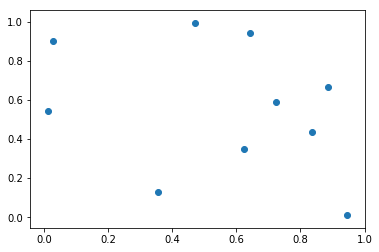

In [7]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

x = np.random.rand(10)
y = np.random.rand(10)

plt.scatter(x,y)
plt.show

In [8]:
import os

os.getcwd()


'/Users/haramasahiro'